In [18]:
# %load PerceptronLearning.py
# define a class named Perceptron, which has a "fit" method, and "predict" method.
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    -------------
    eta : float
      Learning rate (between 0 and 1)
    n_iter : int
      Passes over the training dataset
    random_state : int
      Random number generator seed for random weight in the beginning

    Attributes
    -------------
    w_ : 1d-array
      Weights after fitting
    errors_ : list
      Number of misclassifications(updates) in each epoch

    """

    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, x, y):
        """Fit training data.

        Parameters
        ______________
        x : (array-like), shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples(rows) and
            n_features is the number of features(columns)
        y : array-like, shape = [n_samples]
            Traget values

        Returns
        ______________
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + x.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [6]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We extract the first 100 class labels (50 setosa and 50 versicolor), convert the class label into the two integer class labels 1(versicolor) and -1(setosa), and assign to a vector y.
Similarly, extrac the first feature column(sepal length) and the third feature column(petal length) of those 100 training samples and assign them to a feature matrix X.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# select setosa (column 1) and versicolor (column 3)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [13]:
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
print(X[:3])

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]


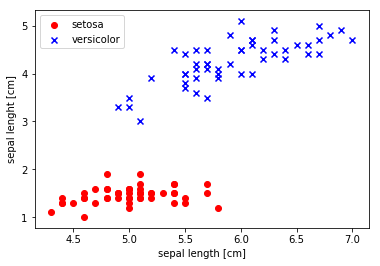

In [16]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')

plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal lenght [cm]')
plt.legend(loc = 'upper left')

plt.show()

Now, let's train our perceptron algorithm.

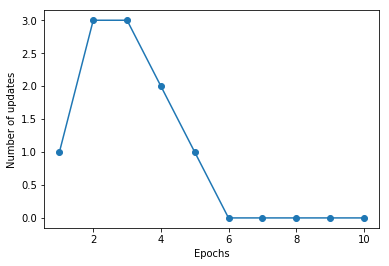

In [42]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1),
        ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel("Number of updates")
plt.show()

Visualization for decision boundaries.

In [48]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[ y == cl, 0],
                    y = X[ y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')

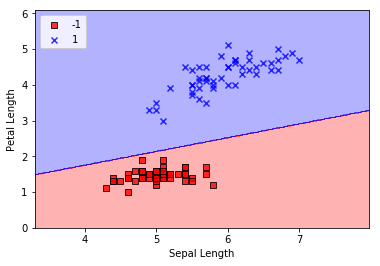

In [49]:
plot_decision_region(X, y, classifier = ppn)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc = 'upper left')
plt.show()